In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 59 kB/s 
     |████████████████████████████████| 199 kB 70.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=189bd685c9d1c9b0cb6241eefe8ef73f7f8e60cf68f2bc55e1a99e44913d9797
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("test").getOrCreate()

In [ ]:
spark

In [ ]:
df = spark.createDataFrame([
																[0, 35.3, 37.5,32.9],
                               [1, 41.4, -23.5,-15.4],
                               [2, 28.3, -13.3,10.2],
                               [3, 09.5, -9.0,1.0],
                               [4, 62.8, -18.23,17.66],
 	  [5, 63.8, -18.33,10.7],
   	[6, 82.8, -17.23,3.33],
   	[7, 52.8, -13.43,9.976],
   	[8, 72.8, 48.23,11.13],
   	[9, 65.8, 15.43,14.144],
   	[10, 42.8, -13.23,-10.15],
		[11,11.65,23.14,39.25], 
[12,32.34,56.23,10.23],
[13,23.56,-76.21,-23.93],
[14,45.78,-33.33,-9.27],
[15,59.89,-28.47,94.23],
[16,-46.83,29.04,48.23],
[17,45.36,72.83,-92.21],
[18,-26.37,49.28,40.73],
[19,29.49,-39.20,56.93],
[20,85.28,39.20,-49.21],
[21,42.45,-29.47,19.38],
[22,-22.16,40.72,91.30],
[23,20.39,40.17,20.30],
[24,-10.45,-36.59,-12.84],
[25,76.39,15.25,-29.12],
[26,5.60,20.45,29.14],
[27,39.19,-19.49,20.16],
[28,-14.27,38.47,-17.35],
[29,16.19,-38.15,32.43],
[30,56.26,-16.37,13.23],
[31,-94.38,16.19,34.13],
[32,52.14,36.17,-78.35],
[33,-41.25,98.23,75.26],
[34,-87.96,21.58,-47.69],
[35,21.75,63.48,56.42],
[36,43.21,36.14,-74.12],
[37,22.12,-47.26,31.45],
[38,-87.69,12.43,74.63],
[39,21.74,25.33,24.85],
[40,45.63,-75.96,12.27],
[41,22.74,56.34,94.25],
[42,10.25,-3.46,14.16],
[43,-42.12,84.23,12.17],
[44,45.65,-75.23,-36.12],
[45,23.62,-47.36,11.85],
[46,-77.25,74.66,-41.85],
[47,64.26,-33.78,-24.46],
[48,54.72,-21.42,45.78],
[49,24.48,-45.13,24.12],
[50,45.21,-42.12,-31.98],
[51,52.41,34.16,-45.74],
[52,-13.12,45.16,82.56],
[53,84.67,16.73,81.42],
[54,42.19,-47.84,12.35],
[55,-89.52,-86.44,-46.13],
[56,75.96,25.66,41.26],
[57,54.62,46.13,87.34],
[58,-46.42,-28.32,52.70],
[59,65.47,31.24,-66.41],
[60,96.58,-24.30,-50.21]
		 
		 ],["ID","Att_1", "Att_2","Att_3"])


df.show()

+---+------+------+------+
| ID| Att_1| Att_2| Att_3|
+---+------+------+------+
|  0|  35.3|  37.5|  32.9|
|  1|  41.4| -23.5| -15.4|
|  2|  28.3| -13.3|  10.2|
|  3|   9.5|  -9.0|   1.0|
|  4|  62.8|-18.23| 17.66|
|  5|  63.8|-18.33|  10.7|
|  6|  82.8|-17.23|  3.33|
|  7|  52.8|-13.43| 9.976|
|  8|  72.8| 48.23| 11.13|
|  9|  65.8| 15.43|14.144|
| 10|  42.8|-13.23|-10.15|
| 11| 11.65| 23.14| 39.25|
| 12| 32.34| 56.23| 10.23|
| 13| 23.56|-76.21|-23.93|
| 14| 45.78|-33.33| -9.27|
| 15| 59.89|-28.47| 94.23|
| 16|-46.83| 29.04| 48.23|
| 17| 45.36| 72.83|-92.21|
| 18|-26.37| 49.28| 40.73|
| 19| 29.49| -39.2| 56.93|
+---+------+------+------+
only showing top 20 rows



In [ ]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=["Att_1", "Att_2","Att_3"], outputCol="features")

In [ ]:
new_df = vecAssembler.transform(df)
new_df.show()

+---+------+------+------+--------------------+
| ID| Att_1| Att_2| Att_3|            features|
+---+------+------+------+--------------------+
|  0|  35.3|  37.5|  32.9|    [35.3,37.5,32.9]|
|  1|  41.4| -23.5| -15.4|  [41.4,-23.5,-15.4]|
|  2|  28.3| -13.3|  10.2|   [28.3,-13.3,10.2]|
|  3|   9.5|  -9.0|   1.0|      [9.5,-9.0,1.0]|
|  4|  62.8|-18.23| 17.66| [62.8,-18.23,17.66]|
|  5|  63.8|-18.33|  10.7|  [63.8,-18.33,10.7]|
|  6|  82.8|-17.23|  3.33|  [82.8,-17.23,3.33]|
|  7|  52.8|-13.43| 9.976| [52.8,-13.43,9.976]|
|  8|  72.8| 48.23| 11.13|  [72.8,48.23,11.13]|
|  9|  65.8| 15.43|14.144| [65.8,15.43,14.144]|
| 10|  42.8|-13.23|-10.15|[42.8,-13.23,-10.15]|
| 11| 11.65| 23.14| 39.25| [11.65,23.14,39.25]|
| 12| 32.34| 56.23| 10.23| [32.34,56.23,10.23]|
| 13| 23.56|-76.21|-23.93|[23.56,-76.21,-23...|
| 14| 45.78|-33.33| -9.27|[45.78,-33.33,-9.27]|
| 15| 59.89|-28.47| 94.23|[59.89,-28.47,94.23]|
| 16|-46.83| 29.04| 48.23|[-46.83,29.04,48.23]|
| 17| 45.36| 72.83|-92.21|[45.36,72.83,-

In [ ]:


from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=2, seed=1)
model = kmeans.fit(new_df.select('features'))

transformed = model.transform(new_df)
transformed.show()



+---+------+------+------+--------------------+----------+
| ID| Att_1| Att_2| Att_3|            features|prediction|
+---+------+------+------+--------------------+----------+
|  0|  35.3|  37.5|  32.9|    [35.3,37.5,32.9]|         0|
|  1|  41.4| -23.5| -15.4|  [41.4,-23.5,-15.4]|         0|
|  2|  28.3| -13.3|  10.2|   [28.3,-13.3,10.2]|         0|
|  3|   9.5|  -9.0|   1.0|      [9.5,-9.0,1.0]|         0|
|  4|  62.8|-18.23| 17.66| [62.8,-18.23,17.66]|         0|
|  5|  63.8|-18.33|  10.7|  [63.8,-18.33,10.7]|         0|
|  6|  82.8|-17.23|  3.33|  [82.8,-17.23,3.33]|         0|
|  7|  52.8|-13.43| 9.976| [52.8,-13.43,9.976]|         0|
|  8|  72.8| 48.23| 11.13|  [72.8,48.23,11.13]|         0|
|  9|  65.8| 15.43|14.144| [65.8,15.43,14.144]|         0|
| 10|  42.8|-13.23|-10.15|[42.8,-13.23,-10.15]|         0|
| 11| 11.65| 23.14| 39.25| [11.65,23.14,39.25]|         1|
| 12| 32.34| 56.23| 10.23| [32.34,56.23,10.23]|         0|
| 13| 23.56|-76.21|-23.93|[23.56,-76.21,-23...|         

In [ ]:

model.transform(new_df).groupBy("prediction").count().show()


+----------+-----+
|prediction|count|
+----------+-----+
|         1|   17|
|         0|   44|
+----------+-----+



In [ ]:
df1= df.toPandas()
df1

,ID,Att_1,Att_2,Att_3
0,0,35.30,37.50,32.90
1,1,41.40,-23.50,-15.40
2,2,28.30,-13.30,10.20
3,3,9.50,-9.00,1.00
4,4,62.80,-18.23,17.66
...,...,...,...,...
56,56,75.96,25.66,41.26
57,57,54.62,46.13,87.34
58,58,-46.42,-28.32,52.70
59,59,65.47,31.24,-66.41


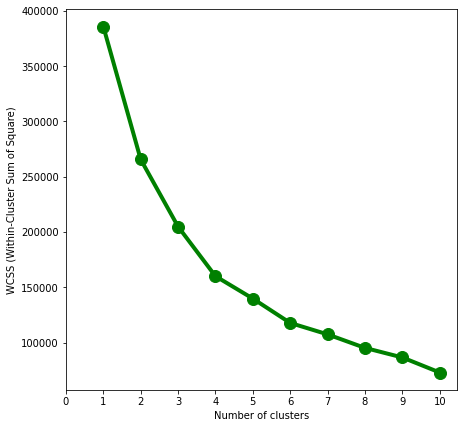

In [ ]:
#find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(df1)
    WCSS.append(model.inertia_)

    
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Square)")
plt.show()  

In [ ]:
#since elbow is formed at cluster value k=4

model = KMeans(n_clusters = 4, init = "k-means++")
k_means = model.fit(df1)

k_means.cluster_centers_

array([[ 30.375     ,  22.29125   ,  43.29875   ,  51.14625   ],
       [ 37.5       ,  64.605     ,  30.08625   , -60.67125   ],
       [ 24.82142857,  40.37464286, -30.98785714,  10.4       ],
       [ 38.77777778, -65.16      ,  17.98222222,   7.64888889]])

In [ ]:
df1['clusters']  = k_means.labels_
df1.head()

,ID,Att_1,Att_2,Att_3,clusters
0,0,35.3,37.50,32.90,0
1,1,41.4,-23.50,-15.40,2
2,2,28.3,-13.30,10.20,2
3,3,9.5,-9.00,1.00,2
4,4,62.8,-18.23,17.66,2


In [ ]:
df1['clusters'].value_counts()

2    28
0    16
3     9
1     8
Name: clusters, dtype: int64

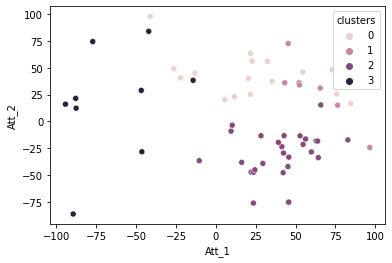

In [ ]:
import seaborn as sns
sns.scatterplot(x='Att_1',y='Att_2',hue='clusters',data=df1)

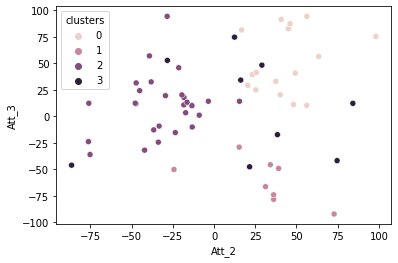

In [ ]:
sns.scatterplot(x='Att_2',y='Att_3',hue='clusters',data=df1)

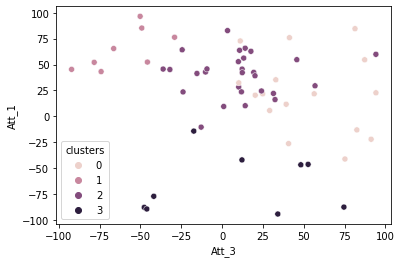

In [ ]:
sns.scatterplot(x='Att_3',y='Att_1',hue='clusters',data=df1)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', 
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(new_df)
    
    output=KMeans_fit.transform(new_df)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.5158743179581223
Silhouette Score: 0.47404283241379397
Silhouette Score: 0.5119881509320797
Silhouette Score: 0.39052033698939564
Silhouette Score: 0.40430751921000974
Silhouette Score: 0.4177820077273959
Silhouette Score: 0.3496954746509451
Silhouette Score: 0.38161698999082516


Text(0, 0.5, 'cost')

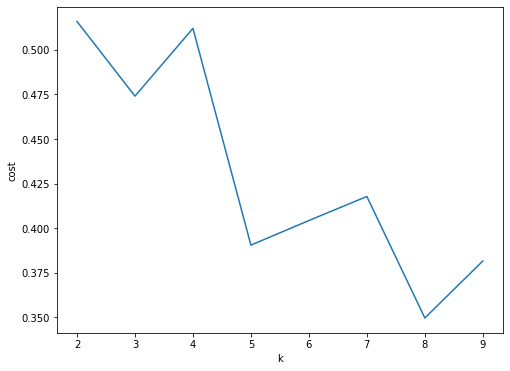

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', 
                                metricName='silhouette', distanceMeasure='cosine')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(new_df)
    
    output=KMeans_fit.transform(new_df)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.5197080227927144
Silhouette Score: 0.3706814842332485
Silhouette Score: 0.534425137773792
Silhouette Score: 0.42667103013156665
Silhouette Score: 0.4368126152358165
Silhouette Score: 0.4563426084043192
Silhouette Score: 0.1998784444652331
Silhouette Score: 0.33710566257942437


Text(0, 0.5, 'cost')

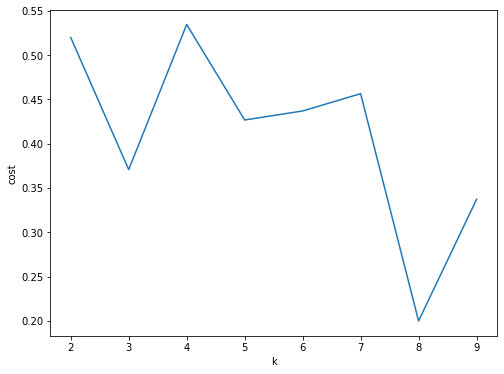

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
data_df = spark.read.csv("/content/drive/MyDrive/IRIS.csv",inferSchema =True,header = True)

In [ ]:
data_df.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [ ]:
data_df.count()

150

In [ ]:
len(data_df.columns)

5

In [ ]:
data_df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [ ]:
data_df.describe().show()

+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|       species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



In [ ]:
data_df.head(4)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, species='Iris-setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, species='Iris-setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, species='Iris-setosa'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, species='Iris-setosa')]

In [ ]:
import seaborn as sns
data_df1 = data_df.toPandas()
data_df1.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


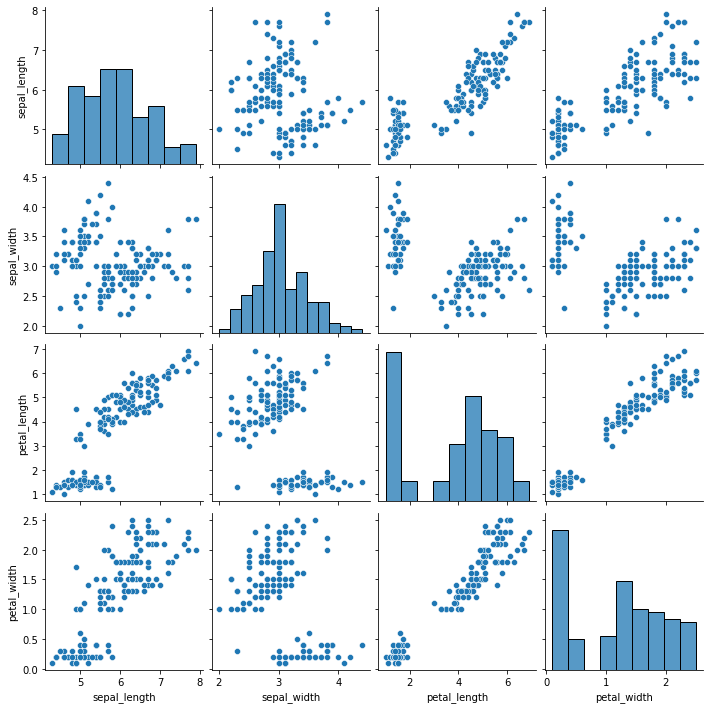

In [ ]:
sns.pairplot(data_df1[['sepal_length','sepal_width','petal_length','petal_width']])

In [ ]:
data_df.groupby("species").count().show()

+---------------+-----+
|        species|count|
+---------------+-----+
| Iris-virginica|   50|
|    Iris-setosa|   50|
|Iris-versicolor|   50|
+---------------+-----+



In [ ]:
data_df.groupby("petal_length").count().show()

+------------+-----+
|petal_length|count|
+------------+-----+
|         5.4|    2|
|         3.5|    2|
|         6.1|    3|
|         6.6|    1|
|         3.7|    1|
|         4.5|    8|
|         5.7|    3|
|         1.4|   12|
|         1.7|    4|
|         6.7|    2|
|         4.9|    5|
|         1.0|    1|
|         4.1|    3|
|         4.0|    5|
|         1.9|    2|
|         3.9|    3|
|         3.8|    1|
|         5.1|    8|
|         4.2|    4|
|         1.3|    7|
+------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [ ]:
data_df.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
input_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
vec_Assembler =  VectorAssembler(inputCols=input_columns,outputCol = "features")

In [ ]:
final_data = vec_Assembler.transform(data_df)

In [ ]:
final_data.show()

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|
|         4.9|  

In [ ]:
final_data.select("features").show()

+-----------------+
|         features|
+-----------------+
|[5.1,3.5,1.4,0.2]|
|[4.9,3.0,1.4,0.2]|
|[4.7,3.2,1.3,0.2]|
|[4.6,3.1,1.5,0.2]|
|[5.0,3.6,1.4,0.2]|
|[5.4,3.9,1.7,0.4]|
|[4.6,3.4,1.4,0.3]|
|[5.0,3.4,1.5,0.2]|
|[4.4,2.9,1.4,0.2]|
|[4.9,3.1,1.5,0.1]|
|[5.4,3.7,1.5,0.2]|
|[4.8,3.4,1.6,0.2]|
|[4.8,3.0,1.4,0.1]|
|[4.3,3.0,1.1,0.1]|
|[5.8,4.0,1.2,0.2]|
|[5.7,4.4,1.5,0.4]|
|[5.4,3.9,1.3,0.4]|
|[5.1,3.5,1.4,0.3]|
|[5.7,3.8,1.7,0.3]|
|[5.1,3.8,1.5,0.3]|
+-----------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
kmeans = KMeans(featuresCol="features",k=3)

In [ ]:
model = kmeans.fit(final_data)

In [ ]:
model

KMeansModel: uid=KMeans_92d871b20e0c, k=3, distanceMeasure=euclidean, numFeatures=4

In [ ]:
model.transform(final_data).groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   50|
|         2|   38|
|         0|   62|
+----------+-----+



In [ ]:
predictions= model.transform(final_data)

In [ ]:
predictions.show()

+------------+-----------+------------+-----------+-----------+-----------------+----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|prediction|
+------------+-----------+------------+-----------+-----------+-----------------+----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|         1|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|         1|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|         1|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|         1|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|         1|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|         1|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|         1|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.

In [ ]:
predictions.dtypes

[('sepal_length', 'double'),
 ('sepal_width', 'double'),
 ('petal_length', 'double'),
 ('petal_width', 'double'),
 ('species', 'string'),
 ('features', 'vector'),
 ('prediction', 'int')]

In [ ]:
predictions = predictions.withColumn("prediction",predictions.prediction.cast('double'))

In [ ]:
predictions.dtypes

[('sepal_length', 'double'),
 ('sepal_width', 'double'),
 ('petal_length', 'double'),
 ('petal_width', 'double'),
 ('species', 'string'),
 ('features', 'vector'),
 ('prediction', 'double')]

In [ ]:
predictions.groupBy("species","prediction").count().show()

+---------------+----------+-----+
|        species|prediction|count|
+---------------+----------+-----+
| Iris-virginica|       0.0|   14|
|    Iris-setosa|       1.0|   50|
|Iris-versicolor|       0.0|   48|
|Iris-versicolor|       2.0|    2|
| Iris-virginica|       2.0|   36|
+---------------+----------+-----+



In [ ]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F
from pyspark.sql.functions import row_number
 
predictions = predictions.select( F.row_number().over(Window.partitionBy().orderBy(predictions['sepal_length'])).alias("row_num"),"sepal_length","sepal_width","petal_length","petal_width","species","features","prediction")
predictions.show()

+-------+------------+-----------+------------+-----------+-----------+-----------------+----------+
|row_num|sepal_length|sepal_width|petal_length|petal_width|    species|         features|prediction|
+-------+------------+-----------+------------+-----------+-----------+-----------------+----------+
|      1|         4.3|        3.0|         1.1|        0.1|Iris-setosa|[4.3,3.0,1.1,0.1]|       1.0|
|      2|         4.4|        2.9|         1.4|        0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|       1.0|
|      3|         4.4|        3.0|         1.3|        0.2|Iris-setosa|[4.4,3.0,1.3,0.2]|       1.0|
|      4|         4.4|        3.2|         1.3|        0.2|Iris-setosa|[4.4,3.2,1.3,0.2]|       1.0|
|      5|         4.5|        2.3|         1.3|        0.3|Iris-setosa|[4.5,2.3,1.3,0.3]|       1.0|
|      6|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|       1.0|
|      7|         4.6|        3.6|         1.0|        0.2|Iris-setosa|[4.6,3.6,1.0,0.2]|  

In [ ]:
vecAssembler = VectorAssembler(inputCols=input_columns, outputCol="test_cen")
df_kmeans = vecAssembler.transform(predictions).select('row_num', 'features')
df_kmeans.show()

+-------+-----------------+
|row_num|         features|
+-------+-----------------+
|      1|[4.3,3.0,1.1,0.1]|
|      2|[4.4,2.9,1.4,0.2]|
|      3|[4.4,3.0,1.3,0.2]|
|      4|[4.4,3.2,1.3,0.2]|
|      5|[4.5,2.3,1.3,0.3]|
|      6|[4.6,3.4,1.4,0.3]|
|      7|[4.6,3.6,1.0,0.2]|
|      8|[4.6,3.1,1.5,0.2]|
|      9|[4.6,3.2,1.4,0.2]|
|     10|[4.7,3.2,1.3,0.2]|
|     11|[4.7,3.2,1.6,0.2]|
|     12|[4.8,3.4,1.9,0.2]|
|     13|[4.8,3.0,1.4,0.1]|
|     14|[4.8,3.1,1.6,0.2]|
|     15|[4.8,3.4,1.6,0.2]|
|     16|[4.8,3.0,1.4,0.3]|
|     17|[4.9,3.1,1.5,0.1]|
|     18|[4.9,3.1,1.5,0.1]|
|     19|[4.9,3.1,1.5,0.1]|
|     20|[4.9,3.0,1.4,0.2]|
+-------+-----------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.clustering import KMeans
import numpy as np
from pyspark.ml.evaluation import ClusteringEvaluator


silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', 
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(final_data)
    
    output=KMeans_fit.transform(final_data)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.8501515983265806
Silhouette Score: 0.7354567373091194
Silhouette Score: 0.6786090104505119
Silhouette Score: 0.5593200358940349
Silhouette Score: 0.553729358000156
Silhouette Score: 0.5360087632845826
Silhouette Score: 0.4517983773633881
Silhouette Score: 0.4631049070416615


Text(0, 0.5, 'cost')

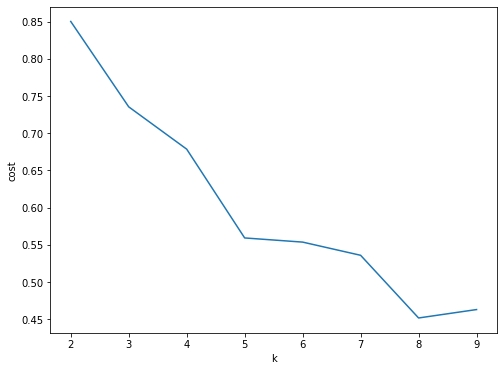

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', 
                                metricName='silhouette', distanceMeasure='cosine')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(final_data)
    
    output=KMeans_fit.transform(final_data)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.911213131291512
Silhouette Score: 0.5397478882812206
Silhouette Score: 0.34615838433587515
Silhouette Score: 0.058767278481570324
Silhouette Score: 0.041095742105156624
Silhouette Score: 0.0217355060506318
Silhouette Score: 0.012807229738018094
Silhouette Score: -0.027885957793475958


Text(0, 0.5, 'cost')

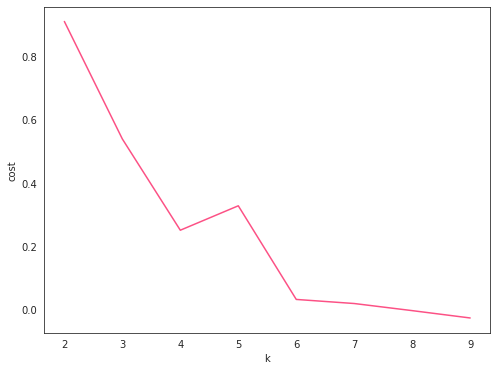

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')